In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import bokeh
import seaborn as sns
import numpy as np
import scipy

In [2]:
full_sheet_df = pd.read_csv("games.csv")

In [3]:
# preview first 5 rows of data
full_sheet_df.head();
full_sheet_df.shape
# quick = full_sheet_df[full_sheet_df["turns"] < 10]
# quick[quick["victory_status"] == "mate"].sort_values(by=["turns"])

(20058, 16)

In [4]:
"""
Goals of analysis for these notebooks:
1) popularity of opening (ECO) vs. elo rating (multi-line graph eg. ridgeline)
2) win rate of (ECO) openings over spectrum of elo ratings (think about how)
3) advantage of playing as white vs. elo rating

""";

In [5]:
# Graph of white player winrate vs. rating
# (create rating bands? and then calculate winrate within those bands?)
# (also, let's only look at rated games)

In [6]:
rated = full_sheet_df[full_sheet_df["rated"] == True]
rated.shape

(16155, 16)

In [7]:
ten_plus_zero_rated = rated[rated["increment_code"] == "10+0"]
condensed = ten_plus_zero_rated[["white_rating", "black_rating", "opening_eco", "opening_name"]]

In [8]:
# these work, full list of all unique opening codes+names
ten_plus_zero_rated.opening_eco.unique();
ten_plus_zero_rated.opening_name.unique();

In [9]:
condensed["rating_avg"] = condensed.loc[:, "white_rating":"black_rating"].mean(axis=1)
condensed.sort_values(by=["rating_avg"]).head(10)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,white_rating,black_rating,opening_eco,opening_name,rating_avg
11467,827,806,B01,Scandinavian Defense,816.5
917,813,841,C20,King's Pawn Game: Leonardis Variation,827.0
11478,889,850,C20,King's Pawn Game,869.5
1655,784,970,C40,King's Knight Opening,877.0
11479,833,930,A40,Englund Gambit,881.5
1667,808,973,A00,Van't Kruijs Opening,890.5
11466,784,1006,C20,King's Pawn Game,895.0
11468,1025,818,B01,Scandinavian Defense,921.5
11469,1027,831,B01,Scandinavian Defense,929.0
3173,906,1001,A40,Englund Gambit Declined | Reversed French,953.5


In [10]:
# now, need to graph opening_eco vs. rating_avg

In [11]:
# let's start with the 10 most popular openings
data = condensed[["rating_avg", "opening_eco"]]
re = data["opening_eco"].value_counts().nlargest(10).index.to_numpy()
top_ten = data[data["opening_eco"].isin(re)]
# list(zip(re, data["opening_eco"].value_counts().nlargest(10).values))

In [14]:
top_ten;

<AxesSubplot:xlabel='rating_avg', ylabel='opening_eco'>

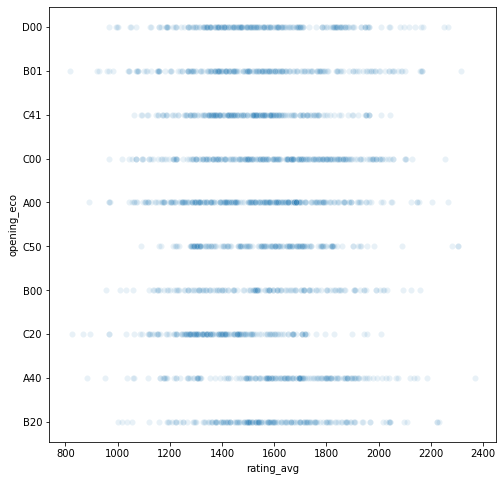

In [12]:
# plot using seaborn
plt.rcParams['figure.figsize'] = [8,8]
sns.scatterplot(data=top_ten, x="rating_avg", y="opening_eco", alpha=0.1, sizes=(20, 800))

In [97]:
# now, I want to put small boxes around the inner 50% of games
sorted_top_ten = top_ten.sort_values(by="rating_avg")
data_df = sorted_top_ten.describe()["rating_avg"]
twentyfive = data_df[4]
seventyfive = data_df[6]

In [30]:
top_ten[top_ten["rating_avg"].duplicated()]

,rating_avg,opening_eco
320,1613.5,A00
796,1651.5,C00
797,1651.5,A00
811,1700.0,D00
1056,1590.0,C00
...,...,...
19907,1552.0,C41
19913,1640.0,C00
20024,1800.0,B20
20049,1290.0,C00


In [31]:
# next, a look at my favorite opening for white and black, and their winrates vs. rating

In [46]:
# first, for White -- the London System
london_system = full_sheet_df[full_sheet_df["opening_eco"].isin(["A48", "D02"])] 
# not sure about D02
london_total_games = london_system.shape[0]
white_london_wins = len(london_system[london_system["winner"] == "white"])
black_london_wins = len(london_system[london_system["winner"] == "black"])
draws_london = london_system.shape[0] - (white_london_wins + black_london_wins)
white_wr = round((white_london_wins/london_total_games)*100,2)
black_wr = round((black_london_wins/london_total_games)*100,2)

In [48]:
london_total_games, white_wr, black_wr

(466, 50.21, 45.06)